In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
#Loading data
data = pd.read_csv('data/House Price India.csv' )

In [4]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [5]:
data.shape

(14619, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [7]:
#Statistical description for the price
round(data['Price'].describe(),2)

count      14619.00
mean      538806.28
std       367229.36
min        78000.00
25%       320000.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: Price, dtype: float64

In [8]:
# Check for nulls
data.isna().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [9]:
#Check for duplicates
data.duplicated().sum()

np.int64(0)

### Condition of the house

In [10]:
data['condition of the house'].unique()

array([5, 3, 4, 2, 1])

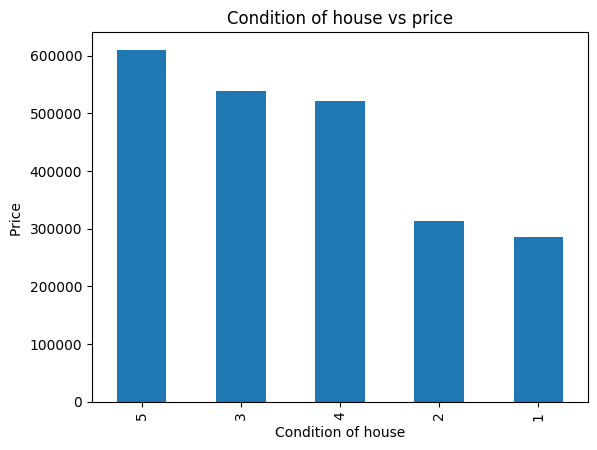

In [11]:
# group by the condition of the house and find the mean price
data.groupby('condition of the house')["Price"].mean().sort_values(ascending = False).plot(kind ='bar')
plt.title('Condition of house vs price')
plt.xlabel('Condition of house')
plt.ylabel('Price ');

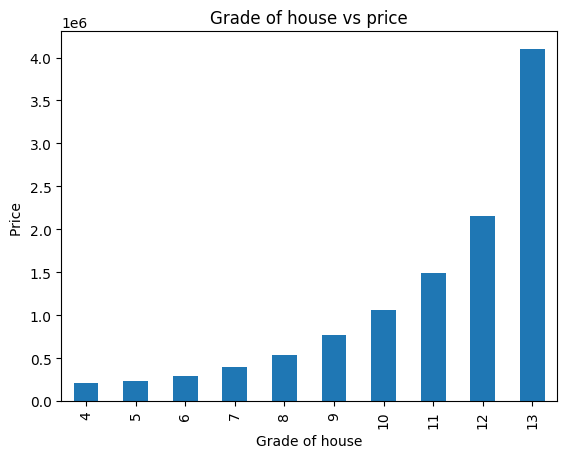

In [12]:
# group by the grade of the house and find the mean price
data.groupby('grade of the house')["Price"].mean().plot(kind ='bar')
plt.title('Grade of house vs price')
plt.xlabel('Grade of house')
plt.ylabel('Price ');

The higher the grade of the house the higher the pricing

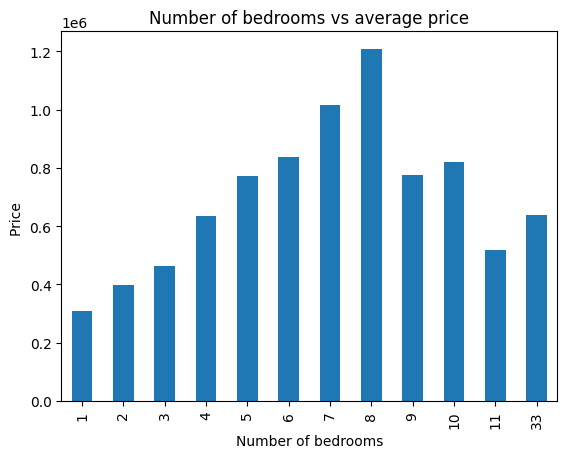

In [13]:
data.groupby('number of bedrooms')["Price"].mean().plot(kind = 'bar')
plt.title('Number of bedrooms vs average price')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price ');

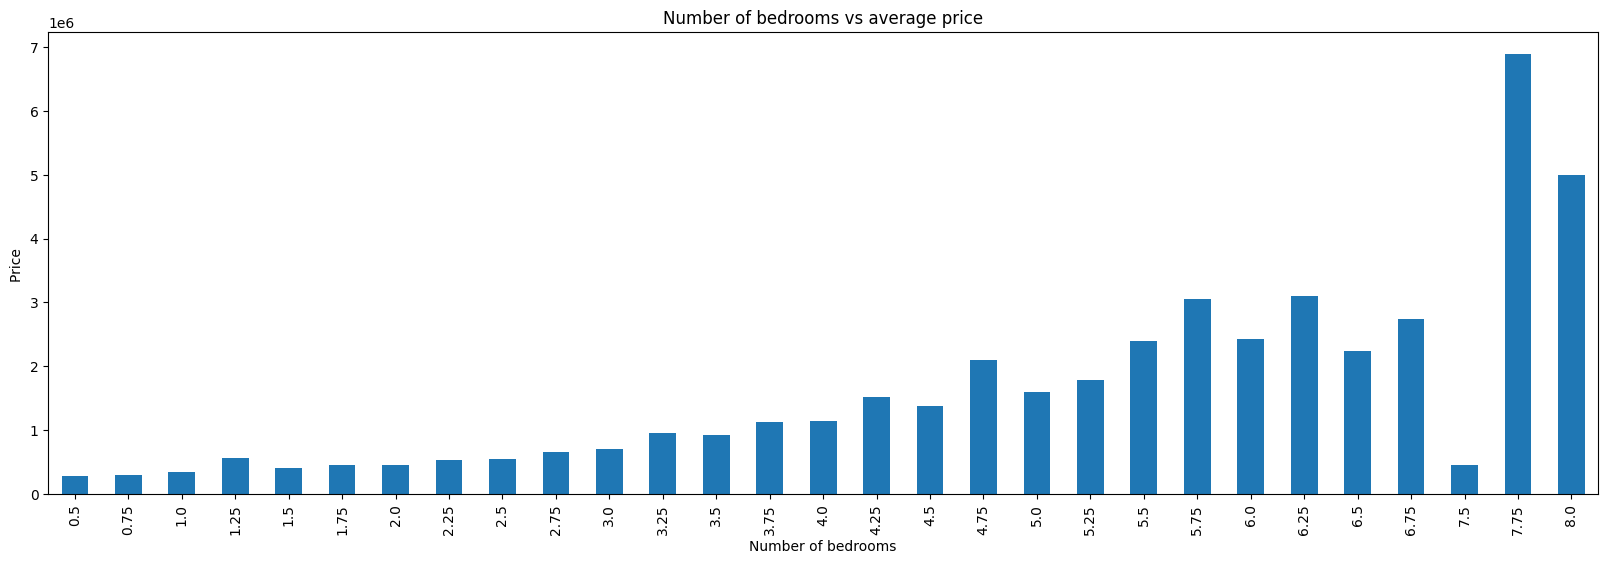

In [14]:
plt.figure(figsize= (20,6))
data.groupby('number of bathrooms')["Price"].mean().plot(kind= 'bar')
plt.title('Number of bedrooms vs average price')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price ');

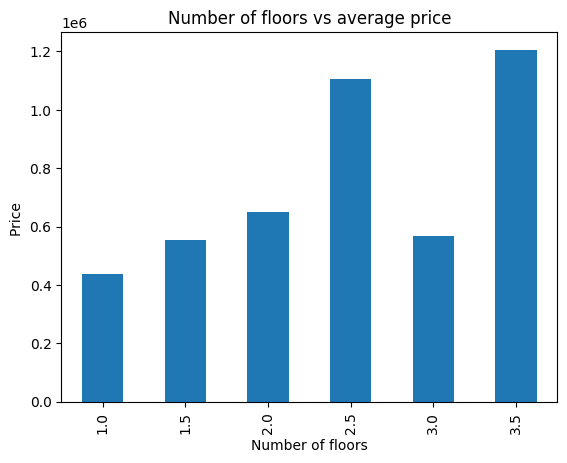

In [15]:
data.groupby('number of floors')["Price"].mean().plot(kind = 'bar')
plt.title('Number of floors vs average price')
plt.xlabel('Number of floors')
plt.ylabel('Price ');

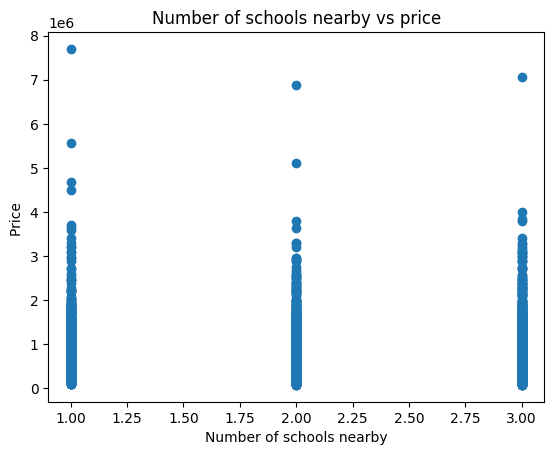

In [16]:
plt.scatter(data['Number of schools nearby'],data['Price'])
plt.title('Number of schools nearby vs price')
plt.xlabel('Number of schools nearby')
plt.ylabel('Price ');

In [17]:
fig = px.scatter_mapbox(
    data,
    lat='Lattitude',
    lon ='Longitude',
    width = 1200,
    height = 800,
    color = "Price",
    hover_data = ["Price"] # display price when hovering over house

)
fig.update_layout(mapbox_style ="open-street-map")
fig.show()

# Model

In [18]:
data.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [19]:
X = data[["number of bedrooms", "number of bathrooms", "number of floors" ,"condition of the house", "grade of the house","Number of schools nearby" ]]
y = data["Price"]


In [20]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (14619, 6)
y shape: (14619,)


In [21]:
X.head()

,number of bedrooms,number of bathrooms,number of floors,condition of the house,grade of the house,Number of schools nearby
0,4,2.50,1.5,5,8,2
1,5,2.75,1.5,3,8,1
2,4,2.50,2.0,3,9,3
3,3,2.00,1.5,4,8,1
4,3,2.50,1.0,4,9,1


In [22]:
# Splitting the data
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
# Check the dimensions of the splits
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (11695, 6)
y_train shape: (11695,)
X_test shape: (2924, 6)
y_test shape: (2924,)


In [24]:
# Setting parameters grid
param_grid = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [25]:
tree_model =DecisionTreeRegressor()

#utilize the gridsearch cross validator
grid_tree=GridSearchCV(estimator = tree_model, param_grid=param_grid,  cv=5, n_jobs=-1)

In [26]:
# Train model
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [27]:
#best parameters
grid_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [28]:
# Make predicitions
tree_preds = grid_tree.predict(X_test)

In [29]:
#model performance
mean_absolute_error(y_test,tree_preds)

np.float64(151368.25884207917)

In [30]:
# Linear Regression Model
lr = LinearRegression()

#Fit model
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
# Make predictions
lr_pred = lr.predict(X_test)

# Model performance
mean_absolute_error(y_test, lr_pred)

np.float64(169882.06405720275)

In [32]:
# Random Forest Model
rf = RandomForestRegressor()

param_grid_rf = {
    "max_depth": [5, 10, 15],
    "n_estimators" :[2, 3, 4, 5, 6, 7, 8, 9, 10]
}


In [33]:
grid_rf = GridSearchCV(rf, param_grid_rf)

#fit model
grid_rf.fit(X_train,y_train)

d:\DataScience\2024\Projects\House-Prices-Prediction-Streamlit\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning:

invalid value encountered in cast



GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [34]:
#Best parameters
grid_rf.best_params_

{'max_depth': 5, 'n_estimators': 7}

In [35]:
#Make predictions
y_pred_rf = grid_rf.predict(X_test)

#Performance
mean_absolute_error(y_test, y_pred_rf)

np.float64(152934.31444381317)

In [36]:
# Export random forest model
import joblib
#joblib.dump(grid_rf, "model.pkl")

['model.pkl']